#Linear Regression


Used when a straigth line can define the relation between features

We can find line equation to predict the answers

**Multiple Linear Regression**

one dependent variable based on two or more independent variables.



Linear Regression:

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

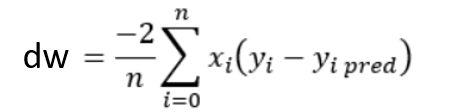

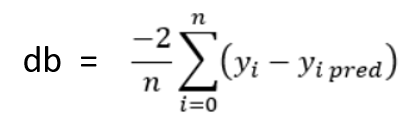

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Linear regression model

In [ ]:
class LinearRegression():
  #initiating the parameters
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

  #fitting the model
    def fit(self, X, y):
        #no_of_training_examples, no_of_features
        self.m, self.n = X.shape
        #weight initialization
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y
        #gradient descent learning
        for i in range(self.iterations):
            self.update_weights(X, y) # Pass X and y to update_weights

    def update_weights(self, X, y): # Added X and y as parameters

        y_prediction = self.predict(self.X)

        #Calculating gradients
        dw = -(2*(self.X.T).dot(self.y - y_prediction))/self.m
        db = -(2/self.m)*np.sum(self.y - y_prediction)

        #Updating parameters
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db


    def predict(self, X):
        return X.dot(self.w) + self.b

##Using LinearRegression model for prediction

WorkFlow:
 1. Set learning Rate and number of Iterations; Initiate Random weight and bias value.
 2. Build Linear Regression Equation(y=wx + b)
 3. Find the "y pred" value for given x value for the corresponding weight & bias.
 4. Check the loss function for these parameter values.(difference between "y pred" & bias value)
 5. Update the parameter values using Gradient Descent.(new weight and bias value)
 6. repeat 3,4,5 till we get minimum loss function

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Data pre-processing

In [ ]:
salary_data = pd.read_csv('/content/drive/MyDrive/salary_data.csv')

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.shape

(30, 2)

In [ ]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

###Splitting

In [ ]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [ ]:
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20, 1)
(10, 1)
(20,)
(10,)


###Training the model

In [ ]:
model= LinearRegression(learning_rate=0.02, iterations=1000)

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
print(model.w)
print(model.b)

[9514.40099904]
23697.406507136307


y = 9514(x) + 23697

salary = 9514(experience) + 23697

###Predicting the values for test data

In [ ]:
test_pred = model.predict(X_test)

In [ ]:
print(test_pred)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicted values and test values

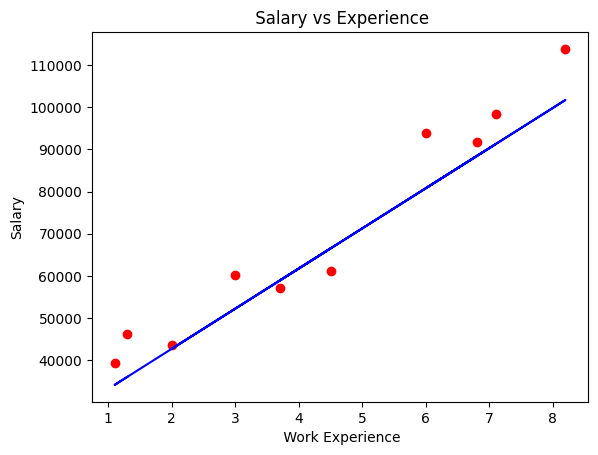

In [ ]:

plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_pred, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import r2_score

mse = r2_score(Y_test, test_pred)
print(mse)

0.904128890392985


#Logistic Regression

1. Supervised Learning model
2. Classification model
3. Best for Binary classification problem
4. Uses Sigmoid function

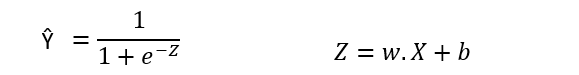


Y_hat --> predicted value

X --> Input Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

**Derivatives:**

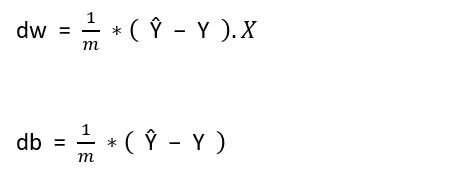


In [ ]:
import numpy as np

##Logistic Regression model

In [ ]:
class Logistic_Regression():


  # declaring learning rate & number of iterations (Hyperparametes)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations



  # fit function to train the model with dataset
  def fit(self, X, Y):

    # number of data points in the dataset (number of rows)  -->  m
    # number of input features in the dataset (number of columns)  --> n
    self.m, self.n = X.shape


    #initiating weight & bias value

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y


    # implementing Gradient Descent for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()



  def update_weights(self):

    # Y_hat formula (sigmoid function)

    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))


    # derivaties

    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))

    db = (1/self.m)*np.sum(Y_hat - self.Y)


    # updating the weights & bias using gradient descent

    self.w = self.w - self.learning_rate * dw

    self.b = self.b - self.learning_rate * db


  # Sigmoid Equation & Decision Boundary

  def predict(self, X):

    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) ))
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred


##Using Logistic_Regression model for prediction

WorkFlow:
 1. Set learning Rate and number of Iterations; Initiate Random weight and bias value.
 2. Build Logistic Regression Equation(sigmoid function)
 3. Find the "y pred" value for given x value for the corresponding weight & bias.
 4. Check the loss function for these parameter values.(difference between "y pred" & bias value)
 5. Update the parameter values using Gradient Descent.(new weight and bias value)
 6. repeat 3,4,5 till we get minimum cost function

 Finally we will get best model as it has cost function
 7. build the "Predict" function to determine the class of the data point

###Data Preprocessing

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
diabetes_data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.shape

(768, 9)

In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-diabetic

1 --> Diabetic

In [ ]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


###Splitting

In [ ]:
features = diabetes_data.drop(columns = 'Outcome', axis=1)
target = diabetes_data['Outcome']

In [ ]:
print(features)
print(target)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


**Standarization**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(features)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(features)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
features = standardized_data
target = diabetes_data['Outcome']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.2, random_state=2)

In [ ]:
print(features.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


###Training the model


In [ ]:
classifier = Logistic_Regression(learning_rate=0.01, no_of_iterations=1000)

In [ ]:
classifier.fit(X_train, Y_train)

Model Evaluation

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy*100)
print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the training data :  77.68729641693811
Accuracy score of the test data :  76.62337662337663


###Making a predictive system

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Support Vector Machine(SVM) Classifier

1. Supervised Learning model
2. Both classification(binary classification) and regression
3. Hyperplane
4. Support Vectors

**SVM Classifier**

Equation of the Hyperplane:

y = wx - b

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

##Support vector machine classifier

In [1]:
import numpy as np

In [31]:
class SVM_classifier():


  # initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  # fitting the dataset to SVM Classifier
  def fit(self, X, Y):

    # m  --> number of Data points --> number of rows
    # n  --> number of input features --> number of columns
    self.m, self.n = X.shape

    # initiating the weight value and bias value

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()

  # function for updating the weight and bias value
  def update_weights(self):

    # label encoding
    y_label = np.where(self.Y <= 0, -1, 1)



    # gradients ( dw, db)
    for index, x_i in enumerate(self.X):

      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1

      if (condition == True):

        dw = 2 * self.lambda_parameter * self.w
        db = 0

      else:

        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]

        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

  # prediction function
  def predict(self, X):
    output = np.dot(X, self.w) - self.b

    predicted_labels = np.sign(output)

    y_hat = np.where(predicted_labels <= -1, 0, 1)

    return y_hat

##Implementing SVM_Classifier() model

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

###Data Processing

In [5]:
diabetes_data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [6]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_data.shape

(768, 9)

In [8]:
# getting the statistical measures of the dataset
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-diabetic

1 --> Diabetic

###Splitting

In [10]:
# separating the features and target

features = diabetes_data.drop(columns='Outcome', axis=1)

target = diabetes_data['Outcome']

In [11]:
print(features)
print(target)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


**Data Standarization**

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(features)

StandardScaler()

In [14]:
standardized_data = scaler.transform(features)

In [15]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [16]:
features = standardized_data
target = diabetes_data['Outcome']

In [17]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [18]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state = 2)

In [19]:
print(features.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


###Training the model

In [32]:
classifier = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)

In [33]:
# training the SVM classifier with training data
classifier.fit(X_train, Y_train)

In [34]:
# accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
# accuracy on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [35]:
print('Accuracy score on training data = ', training_data_accuracy)
print('Accuracy score on test data = ', test_data_accuracy)

Accuracy score on training data =  0.7768729641693811
Accuracy score on test data =  0.7597402597402597


###Predictive system

In [36]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')

else:
  print('The Person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The Person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Lasso Regression

1. Supervised Learning model
2. Regression Model
3. *L*east *A*bsolute *S*hrinkage and *S*election *O*perator
4. Implements Regularization(L1) to avoid Overfitting

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**
Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

*Gradient for Weights*

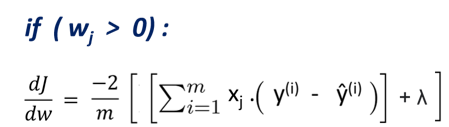

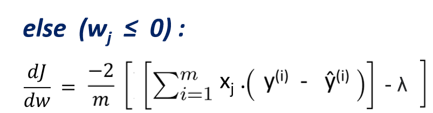


*Gradient for Bias*

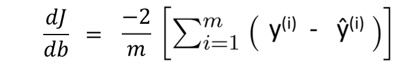


##Lasso_Regression()

In [37]:
import numpy as np

In [49]:
# creating a class for Lasso Regression

class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter
  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):

    # m --> number of Data points --> number of rows
    # n --> number of input features --> number of columns
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):
      self.upadte_weights()


  # function for updating the weight & bias value
  def upadte_weights(self):

    # linear equation of the model
    Y_prediction = self.predict(self.X)

    # gradients (dw, db)

    # gradient for weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>0:

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m

      else :

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m


    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m


    # updating the weights & bias

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db




  # Predicting the Target variable
  def predict(self,X):

    return X.dot(self.w) + self.b


##Implementing Lasso_Regression()

In [39]:
# importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

###Data preprocessing

In [40]:
salary_data= pd.read_csv('/content/drive/MyDrive/salary_data.csv')

In [41]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [42]:
salary_data.shape

(30, 2)

In [43]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [44]:
features = salary_data.iloc[:,:-1].values
target = salary_data.iloc[:,1].values

In [45]:
print(features)
print(target)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


###Splitting

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target,test_size=0.33,random_state = 2)

###Training the model

In [50]:
model = Lasso_Regression(learning_rate = 0.02, no_of_iterations=1000,lambda_parameter=200)

In [51]:
model.fit(X_train , Y_train)

In [52]:
test_data_prediction = model.predict(X_test)

In [53]:
print(test_data_prediction)

[ 36068.90441536  34166.14804787  66513.00629512  58901.98082518
  91248.83907243  80783.67905126 101713.9990936   52242.33353898
  42728.55170156  88394.7045212 ]


###Evaluating

In [55]:
from sklearn import metrics

# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9041366551714738
Mean Absolute Error :  6675.382767802961


Comparing the error with SKLearn Lasso Regression

In [56]:
from sklearn.linear_model import Lasso
sk_model = Lasso()

In [57]:
sk_model.fit(X_train, Y_train)

Lasso()

In [58]:
sk_test_data_prediction = sk_model.predict(X_test)

In [59]:
# R squared error
score_1_ = metrics.r2_score(Y_test, sk_test_data_prediction)

# Mean Absolute Error
score_2_ = metrics.mean_absolute_error(Y_test, sk_test_data_prediction)

print("R squared error : ", score_1_)
print('Mean Absolute Error : ', score_2_)

R squared error :  0.9041817142395875
Mean Absolute Error :  6673.480440148538
